In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn,optim
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.drop(['X1 transaction date','No','X5 latitude','X6 longitude'],axis=1,inplace=True)
df.head(1)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9


In [4]:
X = df.iloc[: , :3]
X = X.values
X = X.astype('float32')
X[:5]

array([[ 32.     ,  84.87882,  10.     ],
       [ 19.5    , 306.5947 ,   9.     ],
       [ 13.3    , 561.9845 ,   5.     ],
       [ 13.3    , 561.9845 ,   5.     ],
       [  5.     , 390.5684 ,   5.     ]], dtype=float32)

In [5]:
y = df.iloc[: , 3]
y = y.values
y = y.astype('float32')
y.shape

(414,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [9]:
from torch.utils.data import DataLoader , TensorDataset
train_ds = TensorDataset(X_train, y_train)
train_ds[0:3]

(tensor([[ 1.3392, -0.7182,  1.5868],
         [ 1.7095, -0.7137,  1.5868],
         [ 0.8543, -0.5424,  0.9168]]),
 tensor([42.0000, 78.3000, 41.0000]))

In [10]:
# Define data loader
batch_size = 30
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Defining a training function

In [11]:
def train(n_epoch, model, criterion, opt):
    loss_list = []
    
    for epoch in range(n_epoch):
        total = 0
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = criterion(pred, yb)
            total+=loss.item()
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
        
        loss_list.append(total)              
    
    return loss_list            

## Linear Regression 

In [12]:
model1 = nn.Linear(3, 1)
print(model1.weight)
print(model1.bias)

Parameter containing:
tensor([[-0.1265, -0.2786,  0.0902]], requires_grad=True)
Parameter containing:
tensor([0.0123], requires_grad=True)


In [13]:
criterion = nn.MSELoss()

In [14]:
opt = torch.optim.SGD(model1.parameters(), 0.001)

In [15]:
l=train(100, model1 , criterion , opt)

In [16]:
preds = model1(X_test)
preds[:5]

tensor([[35.7248],
        [30.7186],
        [34.8316],
        [33.9077],
        [31.6592]], grad_fn=<SliceBackward>)

In [17]:
test = y_test.detach().numpy()
test = test.reshape(-1,1)
test[:5]

array([[39.4],
       [15. ],
       [52.2],
       [20.9],
       [17.4]], dtype=float32)

In [18]:
comp = preds.detach().numpy()
print("Mean absolute error: %.2f" % np.mean(np.absolute(comp - test)))

Mean absolute error: 10.43


In [19]:
print(comp[:5])
print('')
print(test[:5])

[[35.724808]
 [30.718594]
 [34.83161 ]
 [33.907734]
 [31.659197]]

[[39.4]
 [15. ]
 [52.2]
 [20.9]
 [17.4]]


Text(0, 0.5, 'Loss')

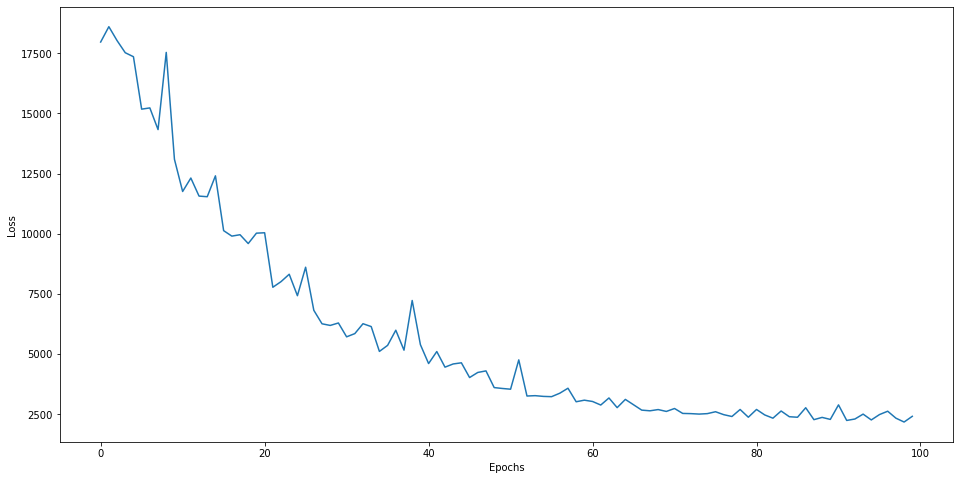

In [20]:
plt.figure(figsize=(16,8))
plt.plot(l)
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Feedfoward Neural Network

In [21]:
class Net(nn.Module):
    #Initilize The Layers
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(3,4)
        self.o1 = nn.ReLU()
        self.l2 = nn.Linear(4,1)
        
    def forward(self,x):
        x = self.l1(x)
        x = self.o1(x)
        x = self.l2(x)
        return(x)

In [22]:
nmodel = Net()

In [23]:
opt1 = torch.optim.SGD(nmodel.parameters(), 0.001)
cr = nn.MSELoss()

In [24]:
co=train(100, nmodel , cr , opt1)

Text(0, 0.5, 'Loss')

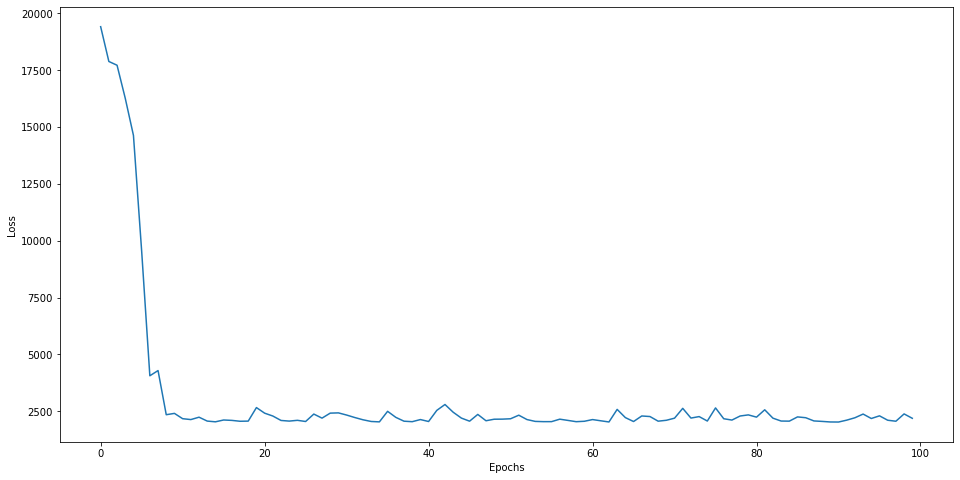

In [25]:
plt.figure(figsize=(16,8))
plt.plot(co)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [26]:
predn = nmodel(X_test)
predn[:5]

tensor([[37.5261],
        [28.2179],
        [37.3988],
        [35.0875],
        [31.0879]], grad_fn=<SliceBackward>)

In [27]:
test1 = y_test.detach().numpy()
test1 = test.reshape(-1,1)
test1[:5]

array([[39.4],
       [15. ],
       [52.2],
       [20.9],
       [17.4]], dtype=float32)

In [28]:
comp1 = predn.detach().numpy()
print("Mean absolute error: %.2f" % np.mean(np.absolute(comp1 - test1)))

Mean absolute error: 9.71


In [29]:
a = np.array([5.0,390.56840,5]).reshape(-1,1)
a = sc_X.fit_transform(a)
a =a.reshape(1,-1)
a = a.astype('float32')
a = torch.from_numpy(a)

In [30]:
fut1 = model1(a)
fut2 = nmodel(a)
print("THE PREDICTED HOUSE PRICE by Linear Regression Model is:",fut1)
print("")
print("THE PREDICTED HOUSE PRICE by Neural Network Model is: ",fut2)

THE PREDICTED HOUSE PRICE by Linear Regression Model is: tensor([[33.5043]], grad_fn=<AddmmBackward>)

THE PREDICTED HOUSE PRICE by Neural Network Model is:  tensor([[33.6828]], grad_fn=<AddmmBackward>)
